# Online Payment Fraud Detection Machine Learning Model

- Dataset fetch from Kaggle [Download Link](https://www.kaggle.com/ealaxi/paysim1/download)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [3]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
print(data.shape)
data.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Performing EDA on the dataset

In [4]:
# Checking for null values in the dataset.
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# Check the whole dataset and well known about type of features and their datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Removing the unnecessary features for model building and training.
data.drop(columns=['nameOrig', 'nameDest'], axis=1, inplace=True)

In [7]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [8]:
# Counting the number of discrete vaulues in the feature 'type'.
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### Visualize the dataset

In [9]:
target = 'isFraud'

In [10]:
# Segregate the counting to plot and visualize the methods of transactions.
type = data['type'].value_counts()
transactions = type.index
quantity = type.values
quantity

array([2237500, 2151495, 1399284,  532909,   41432], dtype=int64)

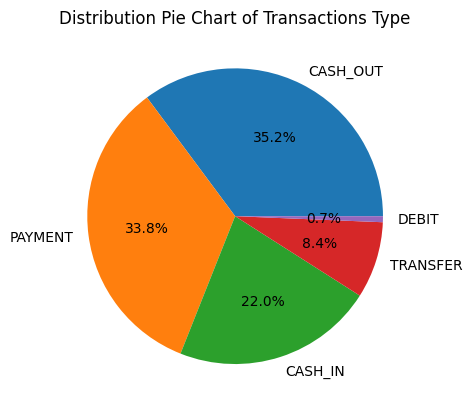

In [11]:
# By plotting the pie chart, visualize the whole dataset.
plt.pie(quantity, labels=transactions, autopct="%1.1f%%")
plt.title('Distribution Pie Chart of Transactions Type')
plt.savefig('static/images/pie_chart.png')
plt.show()

### Converting `type` feature from categorical to numerical feature

In [12]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


### Let's see the correlation of different features with target feature

In [14]:
# Checking for the relation of different features with the target variable.
correlation = data.corr()
correlation[target].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

- Visualize the data graphically

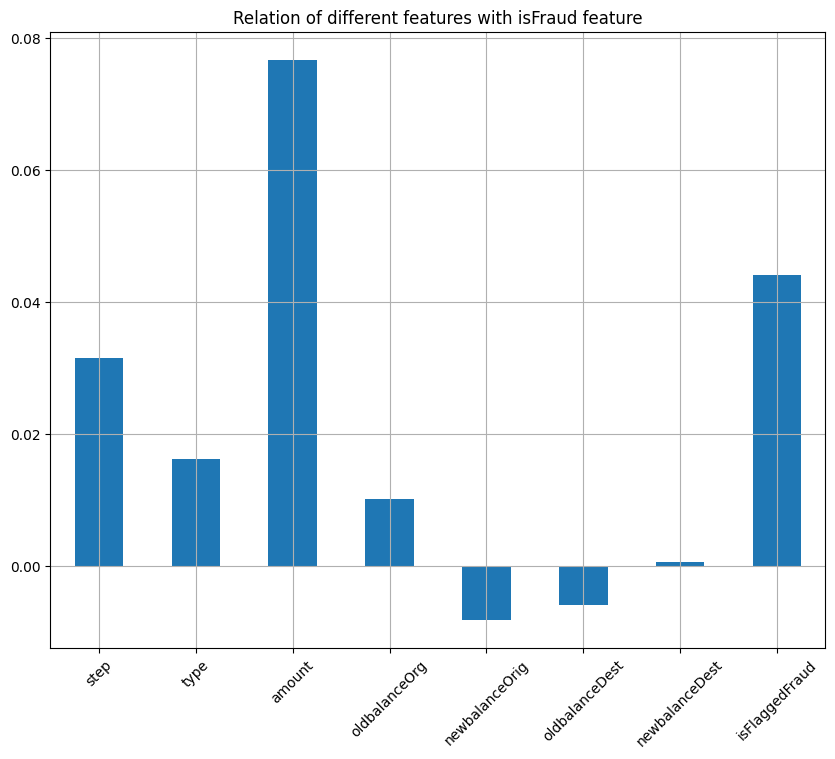

In [15]:
data2 = data.drop(columns=[target], axis=1)
data2.corrwith(data[target]).plot.bar(figsize=(10, 8), title=f'Relation of different features with {target} feature', rot=45, grid=True)
plt.savefig('static/images/target_correlation.png')
plt.show()

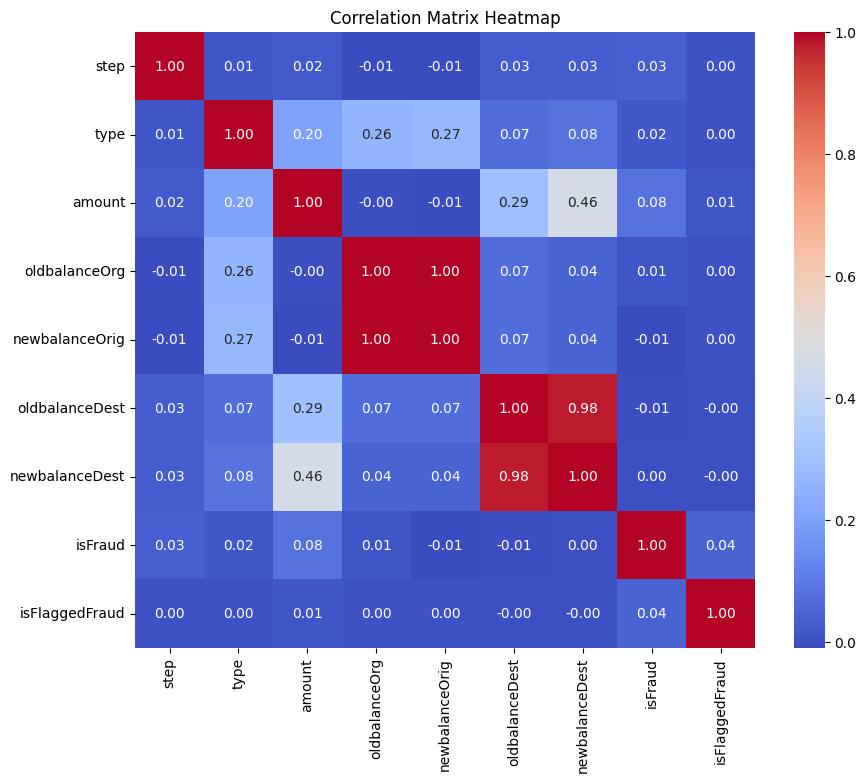

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.savefig('static/images/correlation_heatmap.png')
plt.show()

### Converting target feature into categorical feature

In [17]:
data[target] = data[target].map({0: "No Fraud", 1: "Fraud"})

In [18]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0


### Visualize the different features correspond to target feature

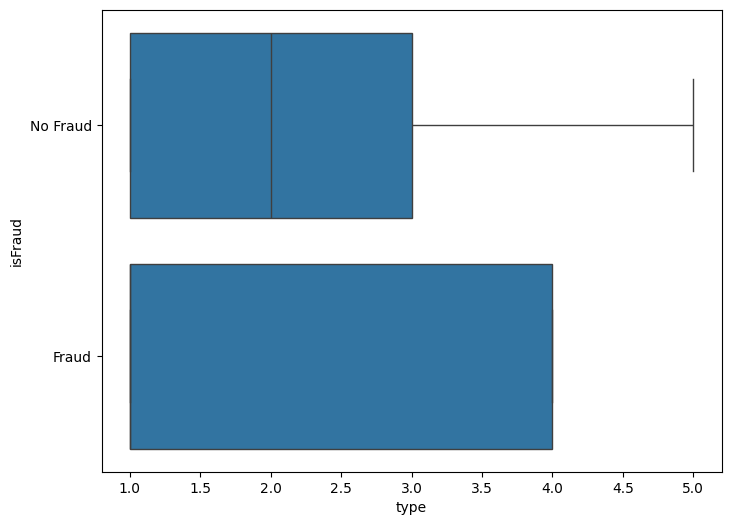

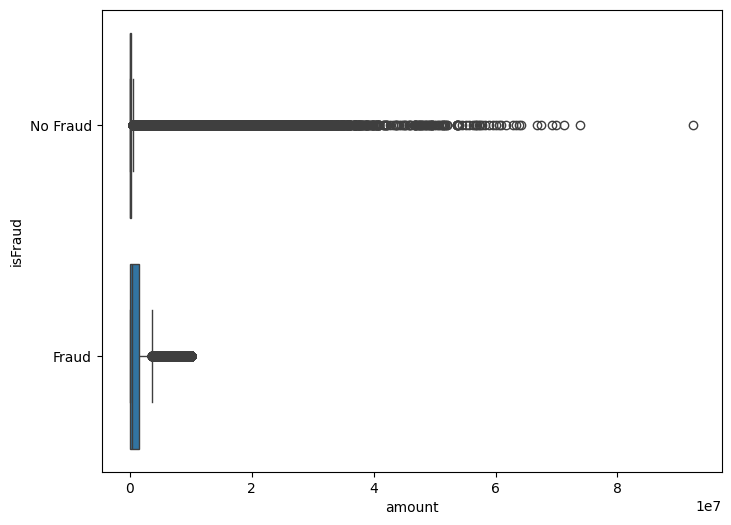

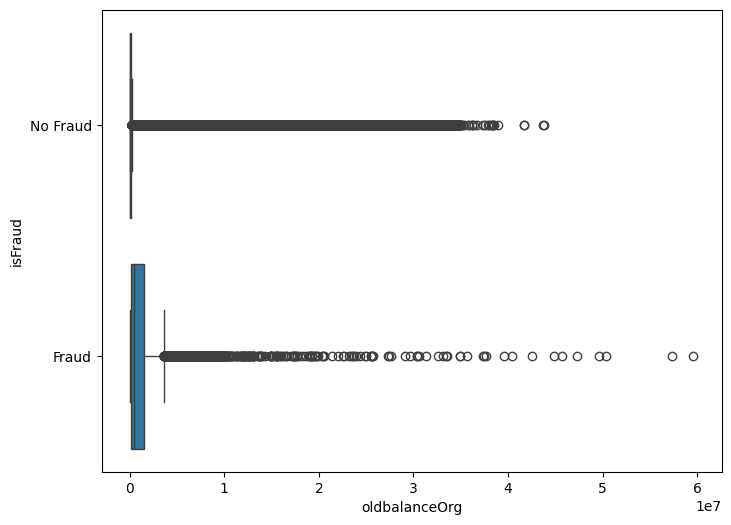

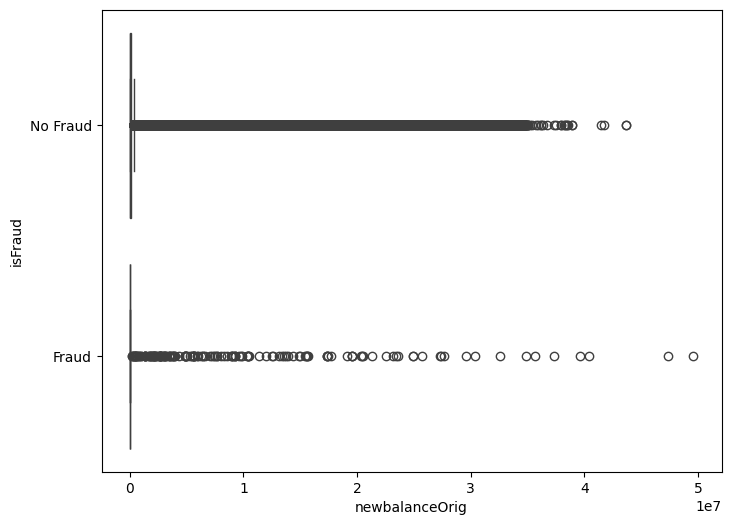

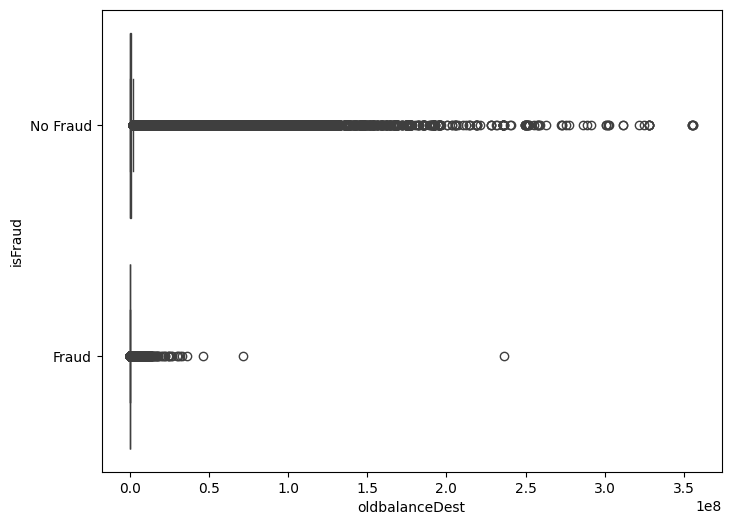

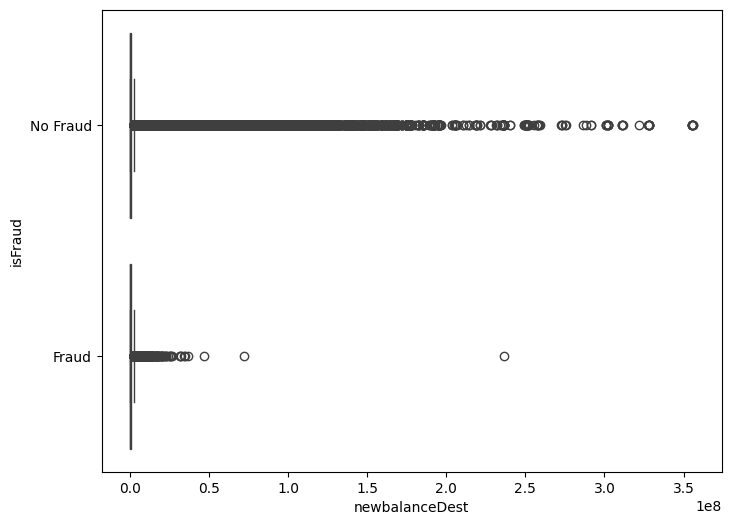

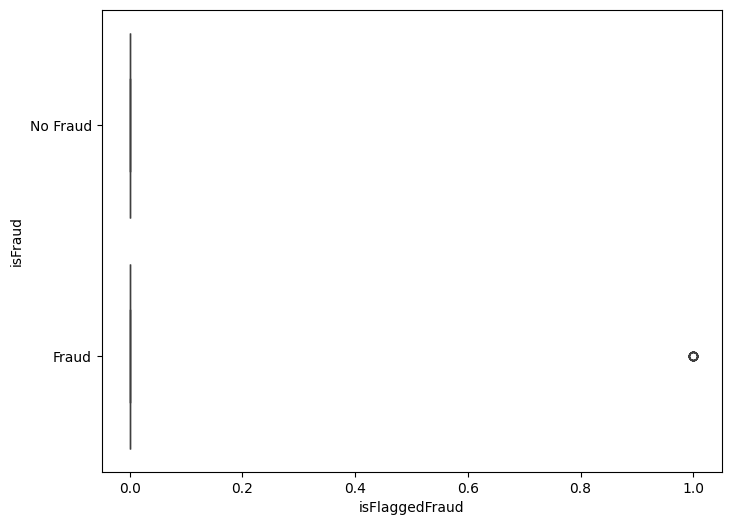

In [19]:
def plot(feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y=target, data=data)
    plt.savefig(f'static/images/{feature}_feature.png')
    plt.show()

features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
for feature in features:
    plot(feature)

## Start Building the model and train it.

In [20]:
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[[target]])

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [23]:
# Analyse the accuracy of the model
accuracy = model.score(xtest, ytest)
accuracy

0.9997029525572798

In [24]:
# Let's see the prediction of the model
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


## Converting model into `joblib` extension file to create a website to interact with non-technical user.

In [25]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

### Create `requirements.txt` file

In [26]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Model is best fitted on `DecisionTreeClassifier` Model with 99.97% accuracy.